In [1]:
# N train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [5]:
# look at N line only
N_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('N')]

In [6]:
# look at all station names
N_train_all['STATION'].unique()

array(['14 ST-UNION SQ', '18 AV', '20 AV', '23 ST', '28 ST', '30 AV',
       '34 ST-HERALD SQ', '36 AV', '36 ST', '4 AV-9 ST',
       '42 ST-PORT AUTH', '49 ST', '4AV-9 ST', '5 AV/59 ST', '57 ST-7 AV',
       '59 ST', '8 AV', '8 ST-NYU', '86 ST', 'ASTORIA BLVD',
       'ASTORIA DITMARS', 'ATL AV-BARCLAY', 'AVENUE U', 'BAY PKWY',
       'CANAL ST', 'CITY HALL', 'CONEY IS-STILLW', 'CORTLANDT ST',
       'DEKALB AV', 'FT HAMILTON PKY', 'KINGS HWY', 'NEW UTRECHT AV',
       'PRINCE ST', 'QUEENSBORO PLZ', 'RECTOR ST', 'TIMES SQ-42 ST'],
      dtype=object)

In [7]:
# check station count
N_train_all['STATION'].count()

43

In [8]:
N_train_all[N_train_all['STATION'] == '59 ST']

,STATION,LINENAME,AM_ENTERS,AM_EXITS
115,59 ST,456NQRW,2201.0,12231.0
116,59 ST,NQR456W,601.0,1950.0
117,59 ST,NRW,6767.0,1097.0


In [10]:
# need to differentiate the two 59 ST before merging
N_train_all.loc[(N_train_all.STATION == '59 ST') & (N_train_all.LINENAME == "NRW"),
                'STATION'] = "59 ST 4 AV"

In [12]:
# needs further cleaning
N_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)

In [14]:
# now sum same name rows
N_commuters = N_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
N_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST-UNION SQ,17962.0,48134.0
18 AV,4645.0,278.0
20 AV,6406.0,300.0
23 ST,982.0,2788.0
28 ST,623.0,3079.0


In [15]:
# order stations in excel
# save as csv
N_commuters.to_csv('N_commuters.csv')

In [16]:
# open ordered CSV
csv_path_N = 'N_commuters_order.csv'
N_commuters_order = pd.read_csv(csv_path_N, encoding="utf-8")
N_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,ASTORIA DITMARS,13218,1005
1,ASTORIA BLVD,5115,1111
2,30 AV,6376,1530
3,36 AV,3598,1718
4,QUEENSBORO PLZ,2983,1833


In [17]:
N_commuters_order['AM_AVG_ENTER'] = N_commuters_order['AM_ENTERS']/5

In [18]:
N_commuters_order['AM_AVG_EXIT'] = N_commuters_order['AM_EXITS']/5
N_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,ASTORIA DITMARS,13218,1005,2643.6,201.0
1,ASTORIA BLVD,5115,1111,1023.0,222.2
2,30 AV,6376,1530,1275.2,306.0
3,36 AV,3598,1718,719.6,343.6
4,QUEENSBORO PLZ,2983,1833,596.6,366.6


In [19]:
# order stations in excel
# save as csv
N_commuters_order.to_csv('N_commuters_final.csv')

In [20]:
# order stations in excel
# save as csv
N_commuters_order.to_csv('N_commuters_final.csv')

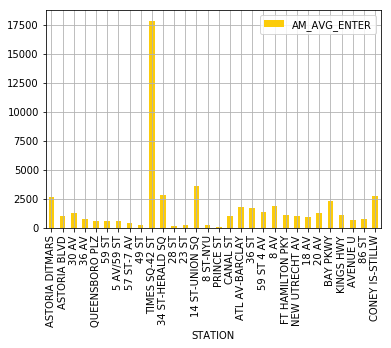

In [21]:
# graph N Train AM AVG ENTERS
plt = N_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FCCC0A')
plt.grid()

# save the fig
plt.figure.savefig('N-AM-enter.pdf')

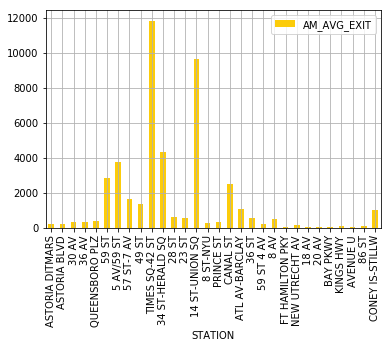

In [22]:
# graph N Train AM AVG EXITS
plt = N_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FCCC0A')
plt.grid()

# save the figa
plt.figure.savefig('N-AM-exit.pdf')